# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load Dataset 

In [2]:
df = pd.read_csv('diabetes.csv')

# Basic Question of EDA

In [5]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
211,0,147,85,54,0,42.8,0.375,24,0
94,2,142,82,18,64,24.7,0.761,21,0
206,8,196,76,29,280,37.5,0.605,57,1
318,3,115,66,39,140,38.1,0.150,28,0
716,3,173,78,39,185,33.8,0.970,31,1


In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.shape

(768, 9)

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


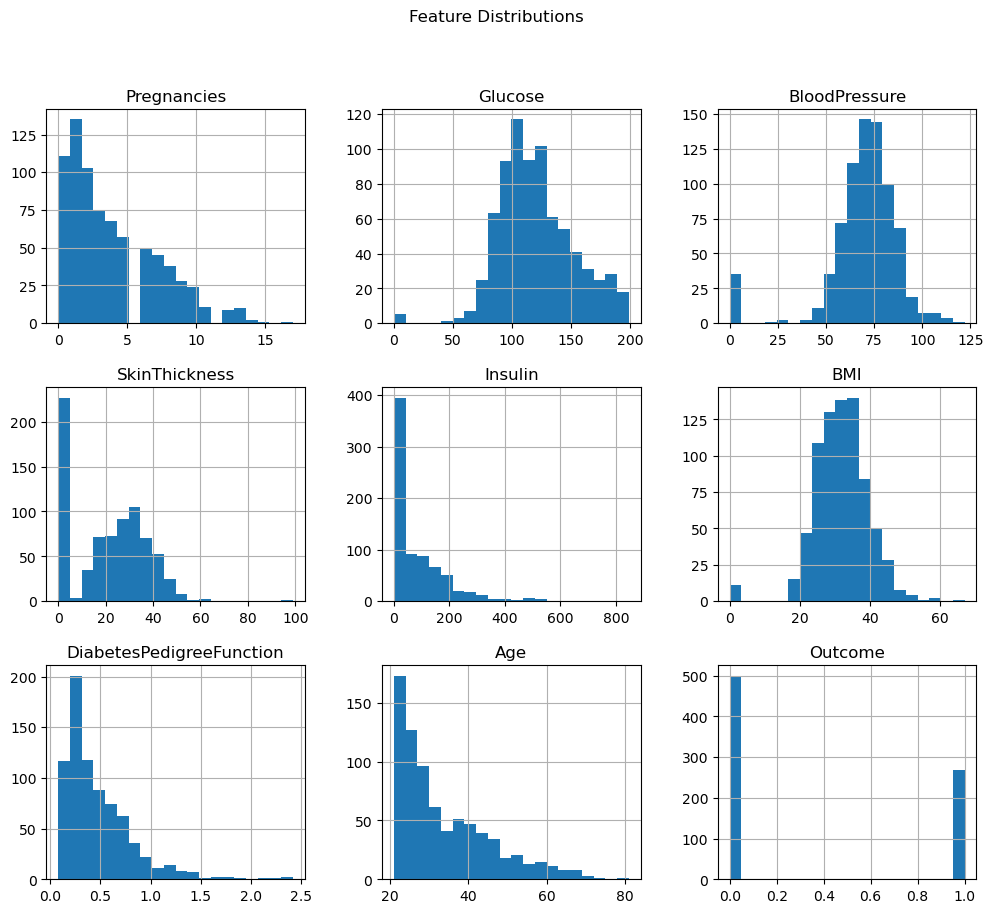

In [14]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

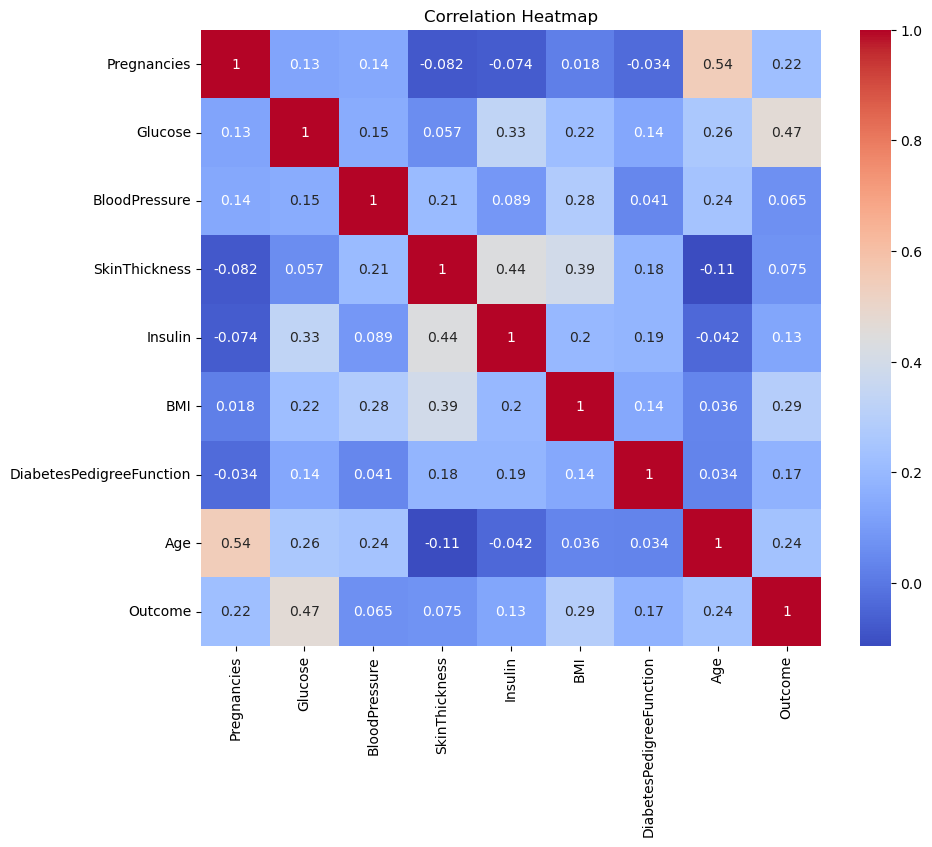

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn import svm

In [19]:
X = df.drop(columns = 'Outcome' , axis = 1)

In [20]:
y = df['Outcome']

In [24]:
scaler = StandardScaler()

In [31]:
X = scaler.fit_transform(X)

In [34]:
X_train  , X_test  , y_train  , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [37]:
model = svm.SVC(kernel = 'linear')

In [38]:
model.fit(X_train,  y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
X_train_pre = model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
Model_Accuracy = accuracy_score(X_train_pre , y_test)

In [51]:
print(np.round(Model_Accuracy* 100 , 0 ), '%')

76.0 %


In [64]:
input_data = (5,166,72,19,175,25.8,0.587,12)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
std_input_data = scaler.transform(input_data)
answer = model.predict(std_input_data)
if answer[0] == 1:
    print("It's Time to Left Sugar 😢")
else:
    print('O Bach Gya Ton 😘')

O Bach Gya Ton 😘


C:\Users\BEST LAPTOP\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
